Use data “sms_spam_collection.csv”

Preprocessing step 1
- lower case
- contraction
- remove number or convert number
- remove punctuation
- remove stopwords
- combine preprocessing method

Preprocessing step 2
- stemming
- lemmatization
- made DTM (tf or tf-idf)


# Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('movies.csv')
df.drop_duplicates(inplace=True)

In [3]:
df_movie = df[['GENRE', 'ONE-LINE']]
df_movie.head()

,GENRE,ONE-LINE
0,"\nAction, Horror, Thriller",\nA woman with a mysterious illness is forced ...
1,"\nAnimation, Action, Adventure",\nThe war for Eternia begins again in what may...
2,"\nDrama, Horror, Thriller",\nSheriff Deputy Rick Grimes wakes up from a c...
3,"\nAnimation, Adventure, Comedy",\nAn animated series that follows the exploits...
4,"\nAction, Crime, Horror","\nA prequel, set before the events of Army of ..."


In [4]:
df_movie.rename(columns={'GENRE':'genre', 'ONE-LINE':'oneline'}, inplace=True)

C:\Users\mirur\AppData\Local\Temp\ipykernel_17952\1929347538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.rename(columns={'GENRE':'genre', 'ONE-LINE':'oneline'}, inplace=True)


# Text Preprocessing 1

Method :
1. converting to lower case
1. contraction
1. remove or convert number into text
1. remove punctuation
1. remove white spaces
1. remove stopwords and particular words

> ## Converting to lower case

In [5]:
def to_lower(text):
    return text.lower()

In [6]:
text_string = "Summer December 10th 2019 "
text_string = to_lower(text_string)
print(text_string)

summer december 10th 2019 


> ## Contraction

- I’ve done it → I have done it
- I’m here → I am here
- You’re smart → You are smart


In [7]:
import re

In [8]:
contractions_dict = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [9]:
text_string = "If I ain't got you"
text_string = main_contraction(text_string)
print(text_string)

If I am not got you


> ## Remove or Convert Number Into Text

In [10]:
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [11]:
text_string = "I was born in 1996"
text_string = remove_numbers(text_string)
print(text_string)

I was born in 


> ## Remove Punctuation

In [12]:
from string import punctuation

In [13]:
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

In [14]:
text_string = "There was bobby, alex, fergie and I"
text_string = remove_punct(text_string)
print(text_string)

There was bobby alex fergie and I


> ## Remove White Spaces

In [15]:
def to_strip(text):
    return " ".join(text.split())

In [16]:
text_string = "There   was      bobby, alex, fergie and I"
text_string = to_strip(text_string)
print(text_string)

There was bobby, alex, fergie and I


> ## Remove Stop Words and Particular Words

Stopwords are words that occur too often and do not provide any additional insight
<br>
Stopwords example:
I, me, myself, we, our, ourselves, you, yourself, …..


In [17]:
# %pip install nltk

In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mirur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mirur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mirur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [21]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [22]:
text_string = "There was bobby, alex, fergie and I"
text_string = remove_stopwords(text_string)
print(text_string)

There bobby , alex , fergie I


> ## Combine Preprocessing Method

In [23]:
pd.options.display.max_colwidth = None

In [24]:
df_movie.duplicated().sum()

np.int64(745)

In [25]:
df_movie['genre'] = df_movie['genre'].fillna('Other')
df_movie = df_movie[df_movie['oneline'] != '\nAdd a Plot\n']
df_movie = df_movie[df_movie['oneline'] != '\nPlot unknown.']
df_movie = df_movie[df_movie['oneline'] != '\nPlot under wraps.']
df_movie = df_movie[df_movie['oneline'] != '\nPlot kept under wraps.']

df_movie.isnull().sum()

C:\Users\mirur\AppData\Local\Temp\ipykernel_17952\4033665138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['genre'] = df_movie['genre'].fillna('Other')


genre      0
oneline    0
dtype: int64

In [26]:
df_movie['genre_prep1'] = df_movie['genre'].apply(to_lower)
df_movie['genre_prep2'] = df_movie['genre_prep1'].apply(main_contraction)
df_movie['genre_prep3'] = df_movie['genre_prep2'].apply(remove_numbers)
df_movie['genre_prep4'] = df_movie['genre_prep3'].apply(remove_punct)
df_movie['genre_prep5'] = df_movie['genre_prep4'].apply(to_strip)
df_movie['genre_prep6'] = df_movie['genre_prep5'].apply(remove_stopwords)
df_movie['oneline_prep1'] = df_movie['oneline'].apply(to_lower)
df_movie['oneline_prep2'] = df_movie['oneline_prep1'].apply(main_contraction)
df_movie['oneline_prep3'] = df_movie['oneline_prep2'].apply(remove_numbers)
df_movie['oneline_prep4'] = df_movie['oneline_prep3'].apply(remove_punct)
df_movie['oneline_prep5'] = df_movie['oneline_prep4'].apply(to_strip)
df_movie['oneline_prep6'] = df_movie['oneline_prep5'].apply(remove_stopwords)
df_movie

,genre,oneline,genre_prep1,genre_prep2,genre_prep3,genre_prep4,genre_prep5,genre_prep6,oneline_prep1,oneline_prep2,oneline_prep3,oneline_prep4,oneline_prep5,oneline_prep6
0,"\nAction, Horror, Thriller",\nA woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.,"\naction, horror, thriller","\naction, horror, thriller","\naction, horror, thriller",\naction horror thriller,action horror thriller,action horror thriller,\na woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.,\na woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.,\na woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.,\na woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight,a woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight,woman mysterious illness forced action group terrorists attempt hijack transatlantic overnight flight
1,"\nAnimation, Action, Adventure",\nThe war for Eternia begins again in what may be the final battle between He-Man and Skeletor. A new animated series from writer-director Kevin Smith.,"\nanimation, action, adventure","\nanimation, action, adventure","\nanimation, action, adventure",\nanimation action adventure,animation action adventure,animation action adventure,\nthe war for eternia begins again in what may be the final battle between he-man and skeletor. a new animated series from writer-director kevin smith.,\nthe war for eternia begins again in what may be the final battle between he-man and skeletor. a new animated series from writer-director kevin smith.,\nthe war for eternia begins again in what may be the final battle between he-man and skeletor. a new animated series from writer-director kevin smith.,\nthe war for eternia begins again in what may be the final battle between heman and skeletor a new animated series from writerdirector kevin smith,the war for eternia begins again in what may be the final battle between heman and skeletor a new animated series from writerdirector kevin smith,war eternia begins may final battle heman skeletor new animated series writerdirector kevin smith
2,"\nDrama, Horror, Thriller",\nSheriff Deputy Rick Grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.,"\ndrama, horror, thriller","\ndrama, horror, thriller","\ndrama, horror, thriller",\ndrama horror thriller,drama horror thriller,drama horror thriller,\nsheriff deputy rick grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.,\nsheriff deputy rick grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.,\nsheriff deputy rick grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.,\nsheriff deputy rick grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive,sheriff deputy rick grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive,sheriff deputy rick grimes wakes coma learn world ruins must lead group survivors stay alive
3,"\nAnimation, Adventure, Comedy",\nAn animated series that follows the exploits of a super scientist and his not-so-bright grandson.,"\nanimation, adventure, comedy","\nanimation, adventure, comedy","\nanimation, adventure, comedy",\nanimation adventure comedy,animation adventure comedy,animation adventure comedy,\nan animated series that follows the exploits of a super scientist and his not-so-bright grandson.,\nan animated series that fol

# Text Preprocessing 2

> ## Stemming

The process of transforming to the root word.
For example you have caring, cares, cared, caringly carefully then you want to consider them as the same words “care”.
We need stemming because treating them as the same words will reduce overfitting.

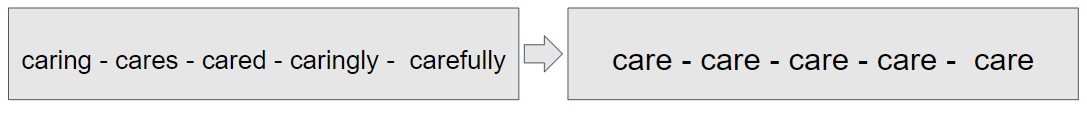

In [27]:
from nltk.stem import SnowballStemmer

In [28]:
snowball_stemmer = SnowballStemmer('english')

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

In [29]:
text_string = "i am reading a book and the book is very fascinating"
text_string = stem(text_string)
print(text_string)

i am read a book and the book is veri fascin


> ## Lemmatization

The process of transforming to the dictionary base form.
caring, cares, cared, caringly carefully will be transformed into care, care, care caringly carefully.
caringly and carefully are listed in the dictionary.
purpose of lemmatization is also to reduce overfitting.

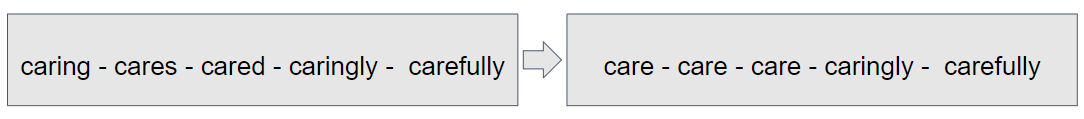

In [30]:
from nltk.stem import WordNetLemmatizer

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mirur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
wordnet_lemmatizer = WordNetLemmatizer()

In [33]:
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

In [34]:
text_string = "there she goes. Here I am"
text_string = lemmatize(text_string)
print(text_string)

there she go . Here I am


> ## Apply Stemming or Lemmatization

In [35]:
df_movie['genre_prep_stem'] = df_movie['genre_prep6'].apply(stem)
df_movie['genre_prep_lemma'] = df_movie['genre_prep6'].apply(lemmatize)
df_movie['oneline_prep_stem'] = df_movie['oneline_prep6'].apply(stem)
df_movie['oneline_prep_lemma'] = df_movie['oneline_prep6'].apply(lemmatize)

df_movie[['genre_prep_stem','genre_prep_lemma','oneline_prep_stem','oneline_prep_lemma']]

,genre_prep_stem,genre_prep_lemma,oneline_prep_stem,oneline_prep_lemma
0,action horror thriller,action horror thriller,woman mysteri ill forc action group terrorist attempt hijack transatlant overnight flight,woman mysterious illness forced action group terrorist attempt hijack transatlantic overnight flight
1,anim action adventur,animation action adventure,war eternia begin may final battl heman skeletor new anim seri writerdirector kevin smith,war eternia begin may final battle heman skeletor new animated series writerdirector kevin smith
2,drama horror thriller,drama horror thriller,sheriff deputi rick grime wake coma learn world ruin must lead group survivor stay aliv,sheriff deputy rick grime wake coma learn world ruin must lead group survivor stay alive
3,anim adventur comedi,animation adventure comedy,anim seri follow exploit super scientist notsobright grandson,animated series follows exploit super scientist notsobright grandson
4,action crime horror,action crime horror,prequel set event armi dead focus german safecrack ludwig dieter lead group aspir thiev top secret heist earli stage zombi apocalyps,prequel set event army dead focus german safecracker ludwig dieter leading group aspiring thief top secret heist early stage zombie apocalypse
...,...,...,...,...
9961,comedi drama,comedy drama,get anonym tip copul lab dean investig girl project threaten expuls univers,getting anonymous tip copulation lab dean investigates girl project threatens expulsion university
9962,comedi drama,comedy drama,big pitch univers tech competit upon girl decid will sacrific everyth particip,big pitch university tech competition upon girl decide willing sacrifice everything participate
9963,anim action adventur,animation action adventure,lenor urg hector test camilla patienc belmont sypha cross path zamfir fearsom guard suspici mind,lenore urge hector test camillas patience belmont sypha cross path zamfir fearsome guard suspicious mind
9976,talkshow,talkshow,actor brian tyre henri godzilla vs kong atlanta woman window guest cohost jerri oconnel justin baldoni,actor brian tyree henry godzilla v kong atlanta woman window guest cohosts jerry oconnell justin baldoni


# Text Exploration

> ## Word Freq

Can be used to identify whether there are still words frequently occur but not meaningful


In [36]:
import seaborn as sns

In [37]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)

    return kamus

In [38]:
genre_unclean = kamus(df_movie['genre_prep_lemma'])
oneline_unclean = kamus(df_movie['oneline_prep_lemma'])

<Axes: ylabel='kata'>

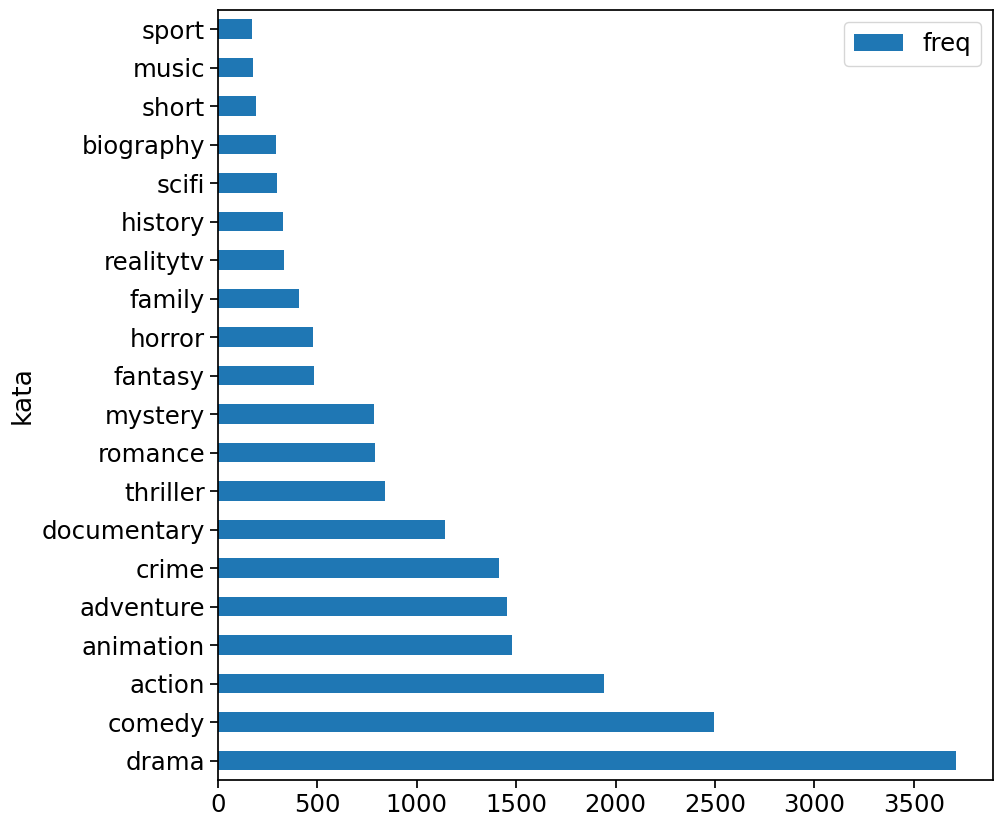

In [39]:
sns.set_context(context = 'notebook', font_scale = 1.6)
genre_unclean[:20].plot(kind = 'barh',figsize = (10,10))

<Axes: ylabel='kata'>

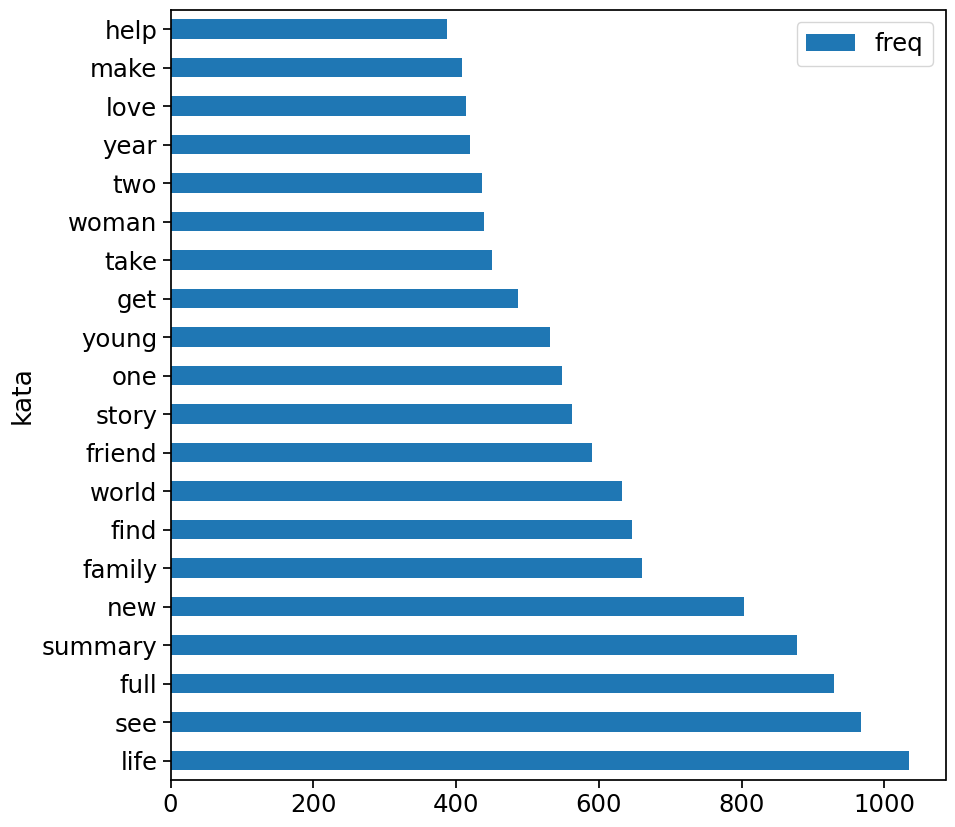

In [40]:
sns.set_context(context = 'notebook', font_scale = 1.6)
oneline_unclean[:20].plot(kind = 'barh',figsize = (10,10))

> ## Word Cloud

Can be used to identify whether there are still words frequently occur but not meaningful
Can be used as comparison


In [41]:
# %pip install wordcloud

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [43]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")

In [44]:
genre_word_cloud = WordCloud().generate(str(df_movie['genre_prep_lemma']))

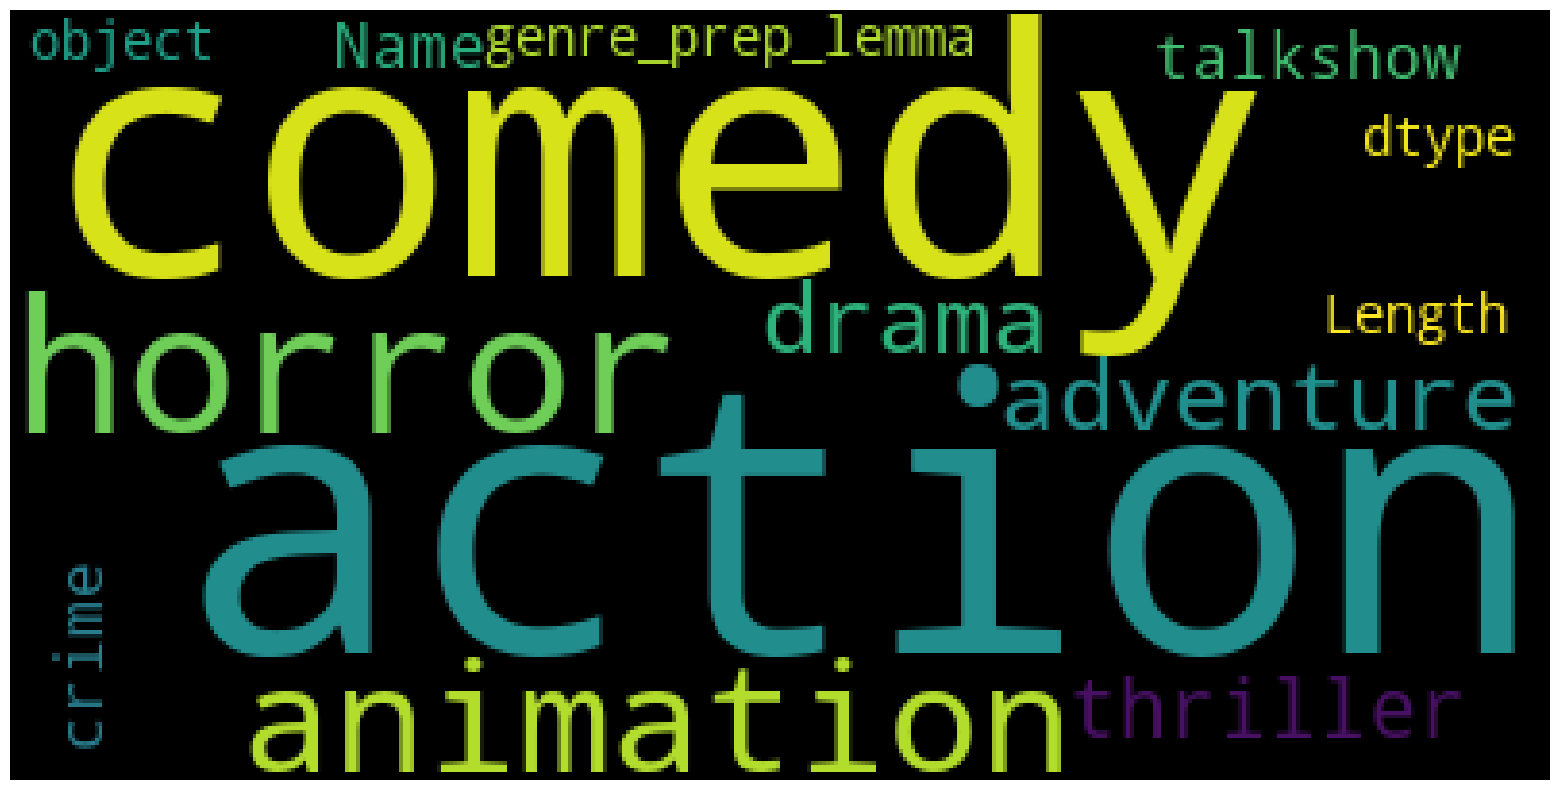

In [45]:
plot_cloud(genre_word_cloud)

In [46]:
online_word_cloud = WordCloud().generate(str(df_movie['oneline_prep_lemma']))

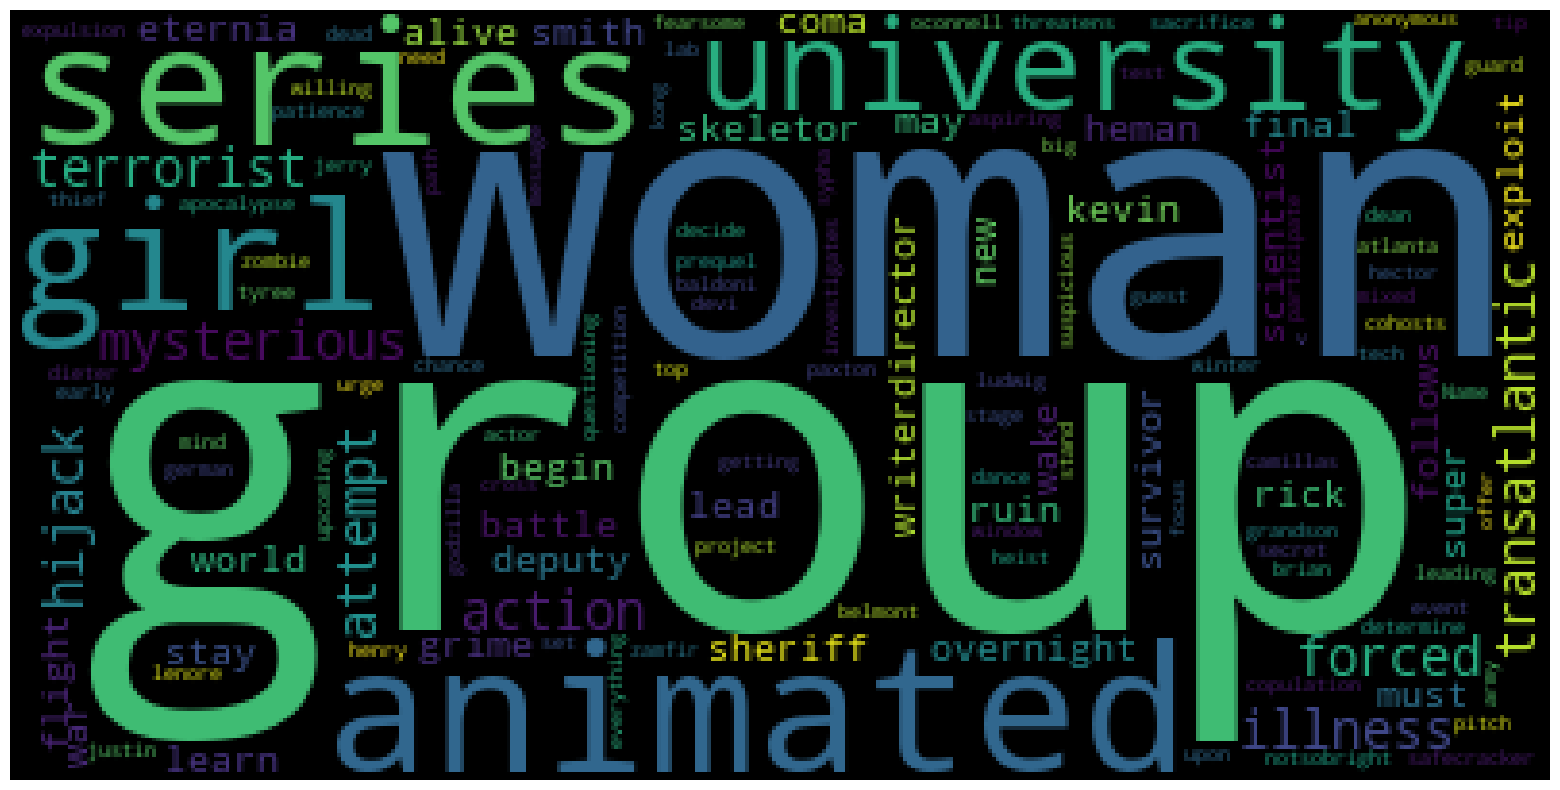

In [47]:
plot_cloud(online_word_cloud)

> ## Word Cloud 2

find any png file then named it 'comment.png'. This file is the file that I have your result migh be different.

In [48]:
# %pip install Pillow

In [49]:
import numpy as np
from PIL import Image

In [50]:
mask = np.array(Image.open('vramroro.png'))

In [51]:
wordcloud = WordCloud(background_color='white', stopwords = stopwords.words('english'), mask=mask, contour_color='steelblue').generate(str(df_movie['genre_prep_lemma']))

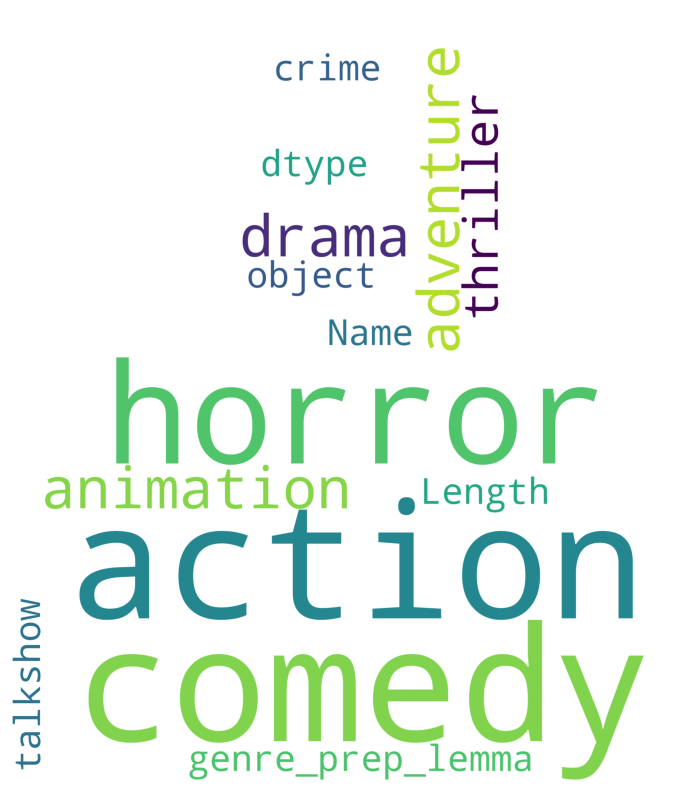

In [52]:
plot_cloud(wordcloud)

In [53]:
wordcloud = WordCloud(background_color='white', stopwords = stopwords.words('english'), mask=mask, contour_color='steelblue').generate(str(df_movie['oneline_prep_lemma']))

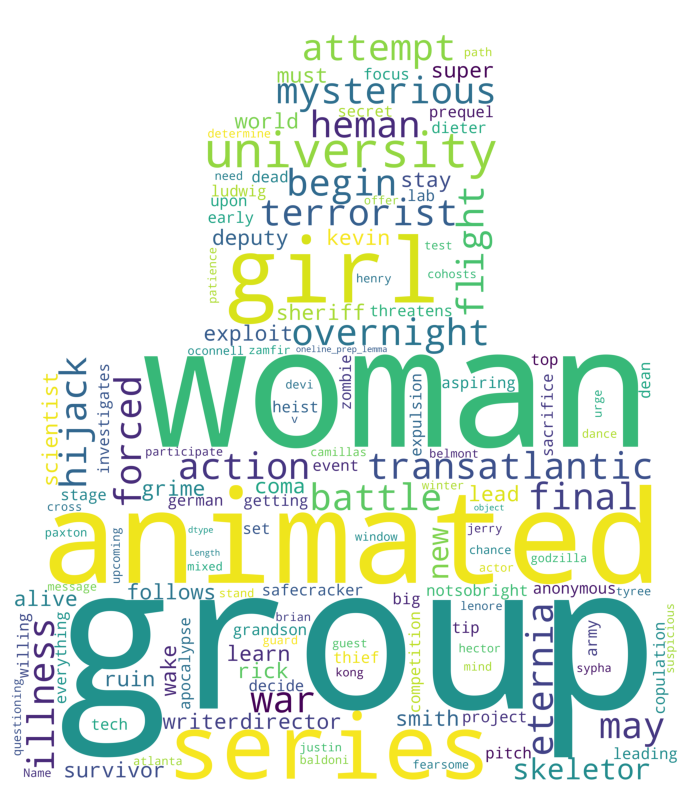

In [54]:
plot_cloud(wordcloud)

> ## Length of Sentence

In identify what can differ between spam and non-spam we can utilize another content such as length of the character


In [55]:
import seaborn as sns

In [56]:
df_movie['length'] = df_movie['oneline'].apply(len)

In [57]:
plt.figure(figsize = (10,10))

df_movie_action = df_movie[df_movie['label'] == 'spam']
df_movie_other = df_movie[df_movie['label'] != 'ham']

sns.histplot(df_sms_spam['length'])
sns.histplot(df_sms_ham['length'])

plt.legend(['spam','ham'])

plt.show()

KeyError: 'label'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.figure(figsize = (10,10))

df_sms2 = df_sms[df_sms['length'] < 200]
df_sms_spam = df_sms2[df_sms2['label'] == 'spam']
df_sms_ham = df_sms2[df_sms2['label'] == 'ham']

sns.histplot(df_sms_spam['length'])
sns.histplot(df_sms_ham['length'])

plt.legend(['spam','ham'])

plt.show()

# Document Term Matrix

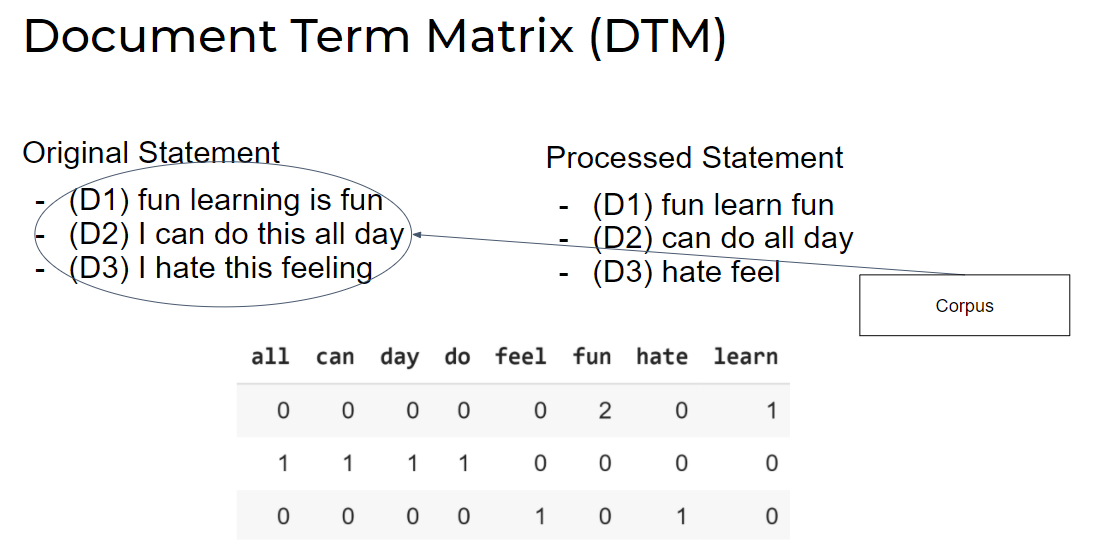

> ## Term Frequency (TF)

- Frequency term in the document
- i.e. if the word appears twice, the frequency in the vector will be 2
- (D1) fun learning is fun


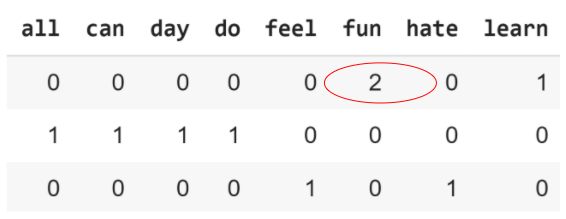

In [ ]:
words_example = ["fun learn fun",
                 "can do all day",
                 "hate feel"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer()
vect.fit(words_example)

In [ ]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_)

In [ ]:
dtm = vect.transform(words_example)

In [ ]:
dtm.toarray()

In [ ]:
vect.get_feature_names_out()

In [ ]:
dtm = pd.DataFrame(dtm.toarray(),
                               columns = vect.get_feature_names_out())

In [ ]:
words_example

In [ ]:
dtm

> ## Term Frequency (TF) - N-grams

Bag of words ignore word order completely.
<br>
These two sentences will have the same tokenization.
- It’s bad, not good at all
- It’s good, not bad at all




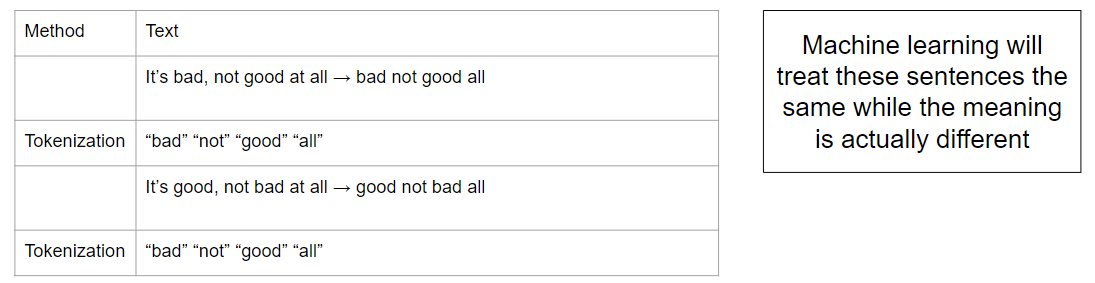

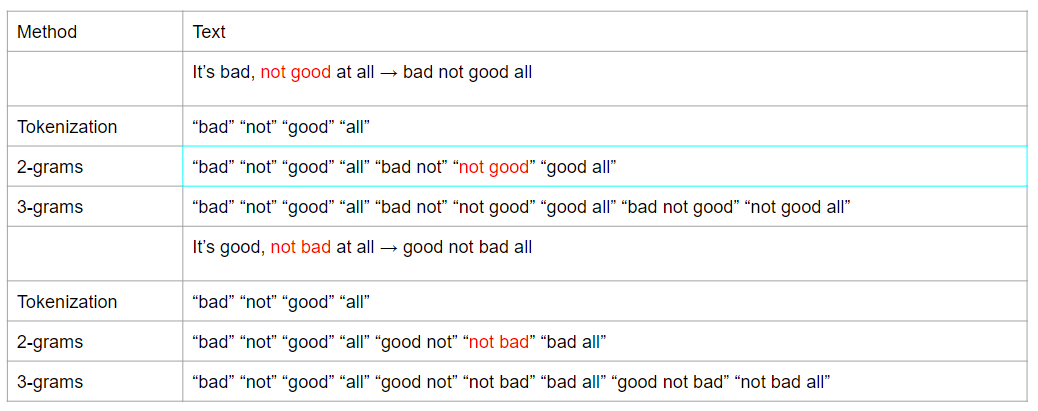

In [ ]:
words_example = ["You already know me, don't you ?",
                 "I am the best there is"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(ngram_range = (1,2))
vect.fit(words_example)

In [ ]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_)

In [ ]:
dtm = vect.transform(words_example)

In [ ]:
dtm.toarray()

In [ ]:
vect.get_feature_names_out()

In [ ]:
dtm = pd.DataFrame(dtm.toarray(),
                               columns = vect.get_feature_names_out())

In [ ]:
words_example

In [ ]:
dtm

> ## Term Frequency - Inverse Document Frequency (TF-IDF)

rescale features by how informative we expect them to be.
give high weight to any term appear often in particular document, not in many documents.
tfidf(word, doc) = tf(word) log((N+1)/(Nw+1)) + 1, with
- tf(word, doc) : term freq of certain word of document
- Nw : number of doc where the words appear
- N : number of doc in training set


TF-IDF Calculation
<br>
tfidf(word, doc) = tf(word,doc) log((N+1)/(Nw+1)) + 1, with
- tfidf for word learning and document D1
- N = 3, Nw = 1, tf(learning,D1) = 1
- tfidf(learning, D1) =  1 log(4/2) + 1 = 1.693


Original Statement
- (D1) fun learning is fun
- (D2) I can do this all day
- (D3) I hate this feeling


In [ ]:
words_example = ["fun learn fun",
                 "can do all day",
                 "hate feel"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer(norm = None)
vect.fit(words_example)

In [ ]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_)

In [ ]:
dtm_tf_idf = vect.transform(words_example)

In [ ]:
dtm_tf_idf.toarray()

In [ ]:
vect.get_feature_names_out()

In [ ]:
dtm_tf_idf = pd.DataFrame(dtm_tf_idf.toarray(),
                               columns = vect.get_feature_names_out())

In [ ]:
dtm_tf_idf